In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print("Training Data: {}, labels: {}".format(len(train_data), len(train_labels)))

Training Data: 25000, labels: 25000


In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
                    [(value,key) for (key,value) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [7]:
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])


In [10]:
#creating validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [10]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=50,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 5s 71ms/step - loss: 0.5247 - accuracy: 0.7875 - val_loss: 0.3719 - val_accuracy: 0.8632
Epoch 2/50
30/30 [==============================] - 1s 25ms/step - loss: 0.2746 - accuracy: 0.9071 - val_loss: 0.2908 - val_accuracy: 0.8858
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 0.1887 - accuracy: 0.9381 - val_loss: 0.2779 - val_accuracy: 0.8911
Epoch 4/50
30/30 [==============================] - 1s 31ms/step - loss: 0.1408 - accuracy: 0.9561 - val_loss: 0.2855 - val_accuracy: 0.8856
Epoch 5/50
30/30 [==============================] - 1s 43ms/step - loss: 0.1095 - accuracy: 0.9693 - val_loss: 0.3017 - val_accuracy: 0.8854
Epoch 6/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0837 - accuracy: 0.9796 - val_loss: 0.3235 - val_accuracy: 0.8821
Epoch 7/50
30/30 [==============================] - 1s 23ms/step - loss: 0.0636 - accuracy: 0.9876 - val_loss: 0.3508 - val_accuracy: 0.8806
Epoch 8/50
30

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


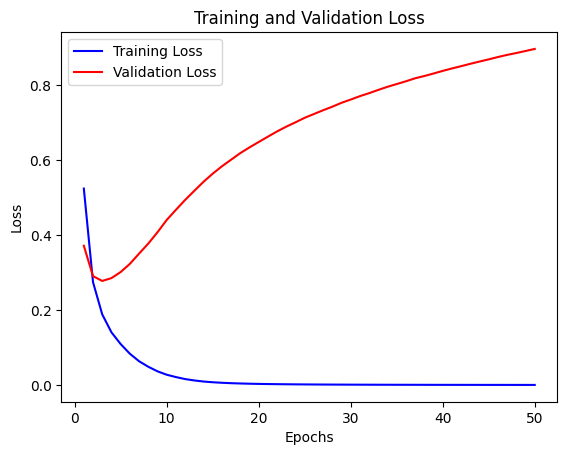

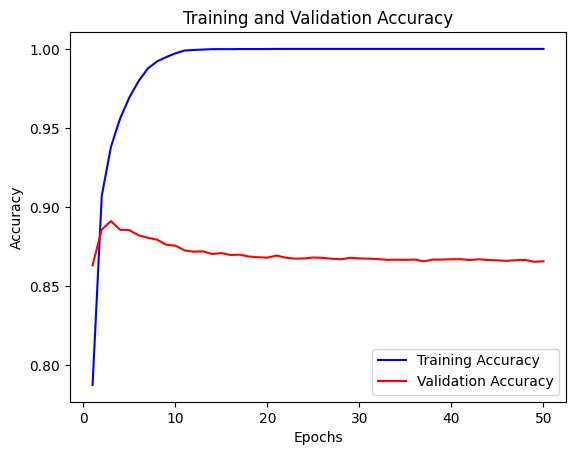

In [12]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9596 - accuracy: 0.8541


## **Question 1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.**

In [14]:
model2=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [15]:
model2.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history2= model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=30,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/30
30/30 [==============================] - 4s 66ms/step - loss: 0.5815 - accuracy: 0.7478 - val_loss: 0.4190 - val_accuracy: 0.8629
Epoch 2/30
30/30 [==============================] - 1s 24ms/step - loss: 0.2994 - accuracy: 0.9021 - val_loss: 0.2872 - val_accuracy: 0.8910
Epoch 3/30
30/30 [==============================] - 1s 23ms/step - loss: 0.1840 - accuracy: 0.9381 - val_loss: 0.2786 - val_accuracy: 0.8893
Epoch 4/30
30/30 [==============================] - 1s 24ms/step - loss: 0.1283 - accuracy: 0.9608 - val_loss: 0.2981 - val_accuracy: 0.8852
Epoch 5/30
30/30 [==============================] - 1s 25ms/step - loss: 0.0906 - accuracy: 0.9758 - val_loss: 0.3314 - val_accuracy: 0.8812
Epoch 6/30
30/30 [==============================] - 1s 24ms/step - loss: 0.0619 - accuracy: 0.9857 - val_loss: 0.3798 - val_accuracy: 0.8765
Epoch 7/30
30/30 [==============================] - 1s 25ms/step - loss: 0.0419 - accuracy: 0.9922 - val_loss: 0.4325 - val_accuracy: 0.8747
Epoch 8/30
30

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160577 (627.25 KB)
Trainable params: 160577 (627.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
results2=model2.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.2037 - accuracy: 0.8541


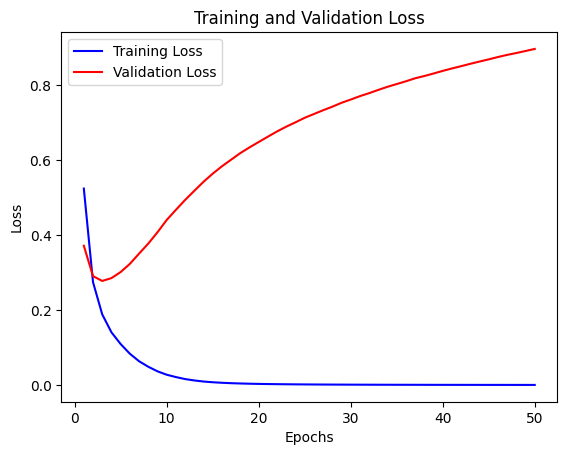

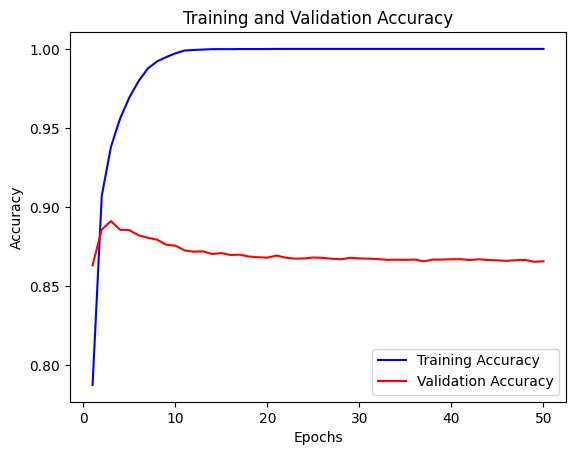

In [18]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Question 2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**

In [19]:
model3=keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [20]:
model3.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history3= model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5142 - accuracy: 0.7801 - val_loss: 0.3421 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2460 - accuracy: 0.9138 - val_loss: 0.2783 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1576 - accuracy: 0.9464 - val_loss: 0.2880 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1104 - accuracy: 0.9667 - val_loss: 0.3146 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0767 - accuracy: 0.9806 - val_loss: 0.3488 - val_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0539 - accuracy: 0.9889 - val_loss: 0.3907 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0373 - accuracy: 0.9939 - val_loss: 0.4436 - val_accuracy: 0.8716
Epoch 8/20
30

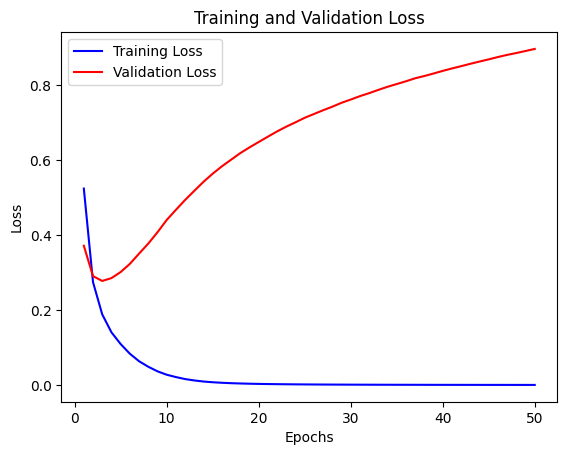

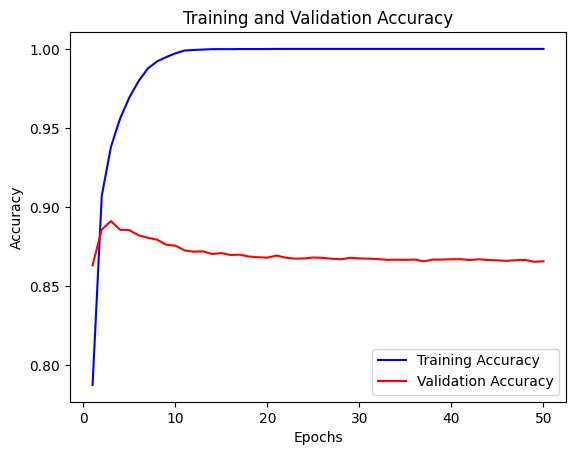

In [21]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
results3=model3.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8608 - accuracy: 0.8550


## 3. Try using the mse loss function instead of binary_crossentropy.

In [23]:
model.compile(optimizer="adam",
             loss="mse",
              metrics=["accuracy"])
history4= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=50,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 4s 65ms/step - loss: 1.3806e-06 - accuracy: 1.0000 - val_loss: 0.1196 - val_accuracy: 0.8651
Epoch 2/50
30/30 [==============================] - 1s 25ms/step - loss: 5.0556e-07 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.8648
Epoch 3/50
30/30 [==============================] - 1s 23ms/step - loss: 3.3803e-07 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 0.8641
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 2.4419e-07 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.8650
Epoch 5/50
30/30 [==============================] - 1s 22ms/step - loss: 1.8740e-07 - accuracy: 1.0000 - val_loss: 0.1215 - val_accuracy: 0.8637
Epoch 6/50
30/30 [==============================] - 1s 23ms/step - loss: 1.4644e-07 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.8636
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 1.2055e-07 - accuracy: 1.0000 - val_loss: 0.1219 - val_ac

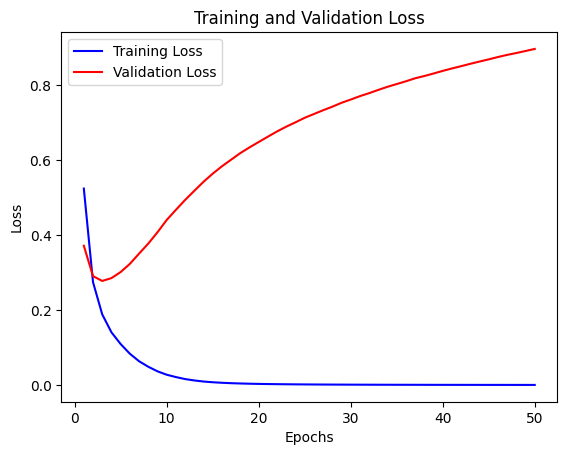

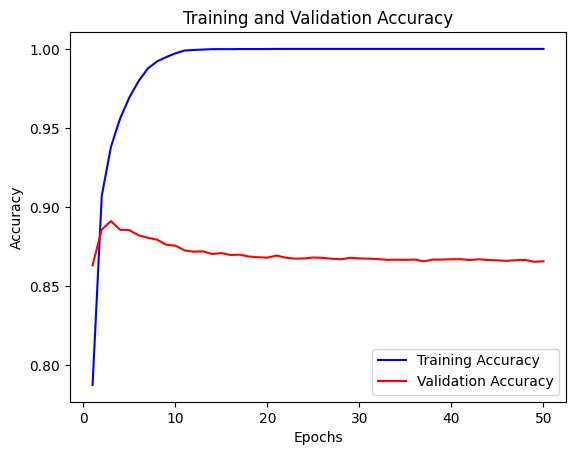

In [24]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [8]:
model4=keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
model4.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history4= model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))
results4=model4.evaluate(x_test,y_test)

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 0.5286 - accuracy: 0.7759 - val_loss: 0.3972 - val_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2968 - accuracy: 0.9045 - val_loss: 0.2987 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2023 - accuracy: 0.9362 - val_loss: 0.2749 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1498 - accuracy: 0.9565 - val_loss: 0.2800 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1129 - accuracy: 0.9719 - val_loss: 0.2894 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0857 - accuracy: 0.9809 - val_loss: 0.3080 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0641 - accuracy: 0.9880 - val_loss: 0.3308 - val_accuracy: 0.8781
Epoch 8/20
30

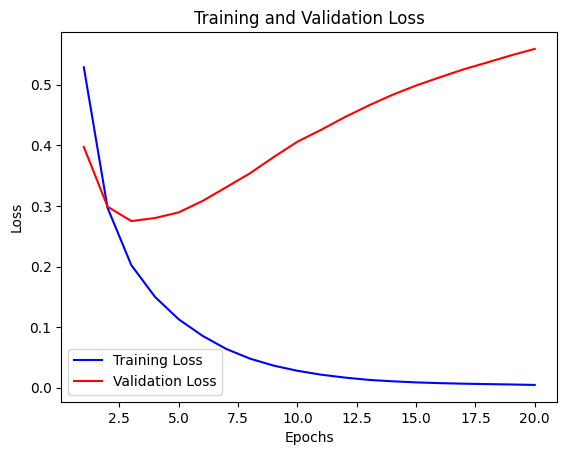

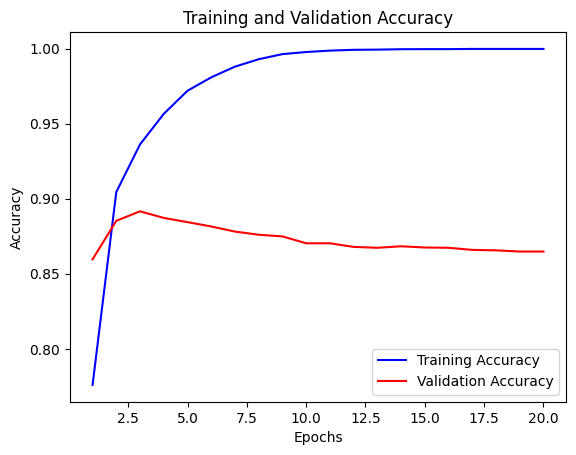

In [14]:
# Extract loss values from the training history
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model5=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [16]:
model5.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history5= model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 118ms/step - loss: 0.6676 - accuracy: 0.5891 - val_loss: 0.6002 - val_accuracy: 0.8148
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5637 - accuracy: 0.7227 - val_loss: 0.4604 - val_accuracy: 0.8590
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4638 - accuracy: 0.7947 - val_loss: 0.3614 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3814 - accuracy: 0.8515 - val_loss: 0.3100 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3247 - accuracy: 0.8824 - val_loss: 0.2822 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2804 - accuracy: 0.9039 - val_loss: 0.2720 - val_accuracy: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2406 - accuracy: 0.9199 - val_loss: 0.2728 - val_accuracy: 0.8910
Epoch 8/20
3

In [17]:
results=model5.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5401 - accuracy: 0.8729


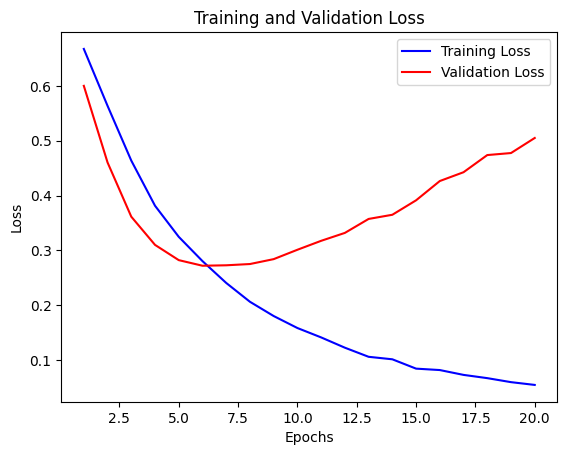

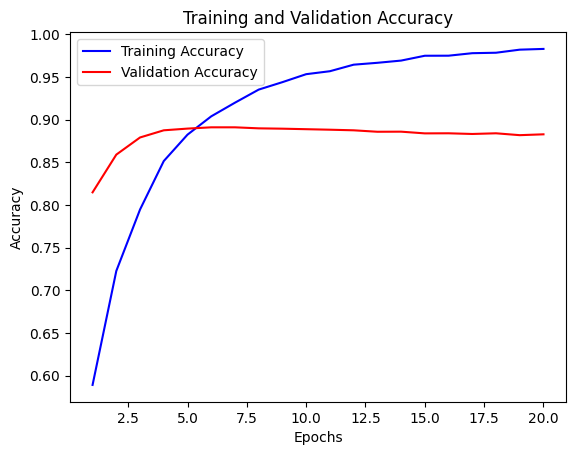

In [18]:
# Extract loss values from the training history
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract loss values from the training history
train_accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()